## Notes

1. Make template notebooks including:
  - Fe isotopes with variable fractionation factors
  - Mg isotopes with constant fractionation factors
  - A trace element system- e.g., Zn? Maybe one that Carrie has published already?


## Fractional mode is not working!!!

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import types
import pandas as pd
import warnings

In [2]:
# %cd ../
import pyMelt as m
# %cd dev

In [3]:
m.__version__

'3.dev0'

In [4]:
lz = m.lithologies.matthews.klb1()
px = m.lithologies.matthews.kg1()

In [5]:
mantle = m.mantle([lz, px], [0.9, 0.1], ['lz', 'px'])

In [6]:
column = mantle.adiabaticMelt(1500.0, dP=-0.004)

/Users/sm905/repos/pyMelt/pyMelt/mantle_class.py:476: UserWarning: Freezing prevented.
  _warn("Freezing prevented.")


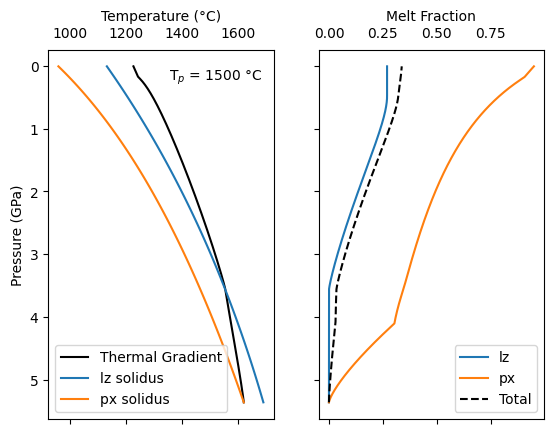

In [7]:
fig, ax = column.plot()

plt.show()

In [8]:
phasediag_klb1 = m.load_phaseDiagram('thermocalc_klb1')
phasediag_kg1 = m.load_phaseDiagram('thermocalc_kg1')

In [9]:
column.calculateChemistry(elements={'lz': {'MgO': np.nan,
                                           'FeO': np.nan},
                                    'px': {'MgO': np.nan,
                                           'FeO': np.nan},
                                    },
                          method='phase_diagram_major',
                          phaseDiagram={'lz': phasediag_klb1,
                                        'px': phasediag_kg1})

/Users/sm905/repos/pyMelt/pyMelt/chemistry/__init__.py:985: UserWarning: The MgO of rut could not be found.
  _warn('The ' + self.name + ' of ' + mineral + ' could not be found.')
/Users/sm905/repos/pyMelt/pyMelt/chemistry/__init__.py:985: UserWarning: The FeO of rut could not be found.
  _warn('The ' + self.name + ' of ' + mineral + ' could not be found.')


In [10]:
column.calculateMineralProportions(method='phase_diagram_major',
                                   phaseDiagram={'lz': phasediag_klb1,
                                                 'px': phasediag_kg1})

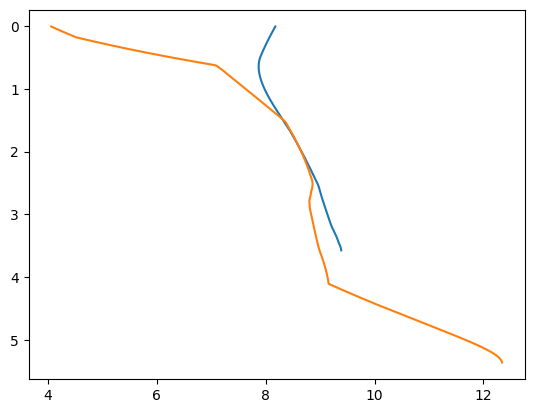

In [11]:
f, a = plt.subplots()

a.plot(column.composition['lz'].olv_FeO, column.composition['lz'].P)
a.plot(column.composition['px'].olv_FeO, column.composition['px'].P)

a.invert_yaxis()

plt.show()


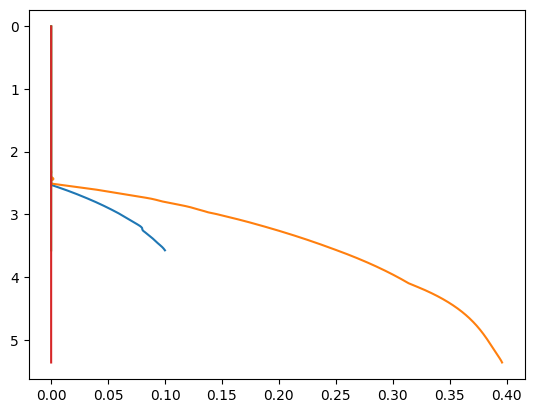

In [12]:
f, a = plt.subplots()

a.plot(column.composition['lz']['grt'], column.composition['lz'].P)
a.plot(column.composition['px']['grt'], column.composition['px'].P)

a.plot(column.composition['lz']['spn'], column.composition['lz'].P)
a.plot(column.composition['px']['spn'], column.composition['px'].P)

a.invert_yaxis()

plt.show()

In [13]:
column.composition['lz']

,P,T,F,liq_MgO,olv_MgO,cpx_MgO,opx_MgO,grt_MgO,spn_MgO,plg_MgO,...,opx_FeO,grt_FeO,spn_FeO,plg_FeO,olv,cpx,opx,grt,spn,plg
0,5.358143,1618.983090,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.354143,1618.883901,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.350143,1618.779676,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.346143,1618.672948,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.342143,1618.564346,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.026143,1228.082604,0.269781,10.229977,50.454580,18.811673,30.996541,3.421187e-23,0.0,0.0,...,4.871142,9.024257e-24,0.0,0.0,0.910344,1.417543e-08,0.089649,0.0,7.881381e-28,7.314234e-06
1334,0.022143,1227.685146,0.269781,10.204504,50.452535,18.805419,30.973015,3.541196e-23,0.0,0.0,...,4.873185,9.340810e-24,0.0,0.0,0.910868,1.314241e-08,0.089126,0.0,8.157849e-28,5.409917e-06
1335,0.018143,1227.287524,0.269781,10.179067,50.450490,18.799649,30.949240,3.452215e-23,0.0,0.0,...,4.875222,9.106099e-24,0.0,0.0,0.911393,1.159163e-08,0.088604,0.0,7.952870e-28,3.012238e-06
1336,0.014143,1226.889738,0.269781,10.153666,50.448445,18.794415,30.925211,3.124590e-23,0.0,0.0,...,4.877253,8.241904e-24,0.0,0.0,0.911916,9.474742e-09,0.088083,0.0,7.198128e-28,8.480007e-08


By mass conservation:

$ c_\textrm{Bulk} \delta_\textrm{Bulk} = \sum x_{ph} c_{ph} \delta_{ph}$

The definition of the fractionation factor:

$ \alpha = \frac{\delta_{min} + 10^3}{\delta_{melt} + 10^3} $

Rearranging:

$ \delta_{min} = \alpha (\delta_{melt} + 10^3) - 10^3 $

Substituting into the first expression:

$ c_\textrm{Bulk} \delta_\textrm{Bulk} = \sum x_{ph} c_{ph} [ \alpha_{ph} (\delta_{melt} + 10^3) - 10^3] + x_{melt} c_{melt} \delta_{melt}$

This rearranges to:

$ \delta_{melt} = \frac{c_{bulk} \delta_{bulk} - 10^3 \left[ \sum x_{ph} c_{ph} \alpha_{ph} - \sum x_{ph} c_{ph} \right]}{ \sum x_{ph} c_{ph} \alpha_{ph} + x_{melt} c_{melt}} $


In [91]:
from pyMelt.core import InputError

def calculateStableIsotopes(self, species, fractionationFactors, isotopeRatioLabel, 
                            bulk=0.0, fractionalExtraction=False, porosity=0.0, 
                            **kwargs):
    """
    Write some documentation here...

    Parameters
    ----------
    species: str 
        The species to calculate the stable isotope fractionation for. E.g., MgO.
        Must correspond to a species that has been calculated in the liquid and
        solid already.
    fractionationFactors : dict
        The mineral-liquid fractionation factors (1000 ln beta) for each mineral 
        in the calculation. The mineral name should be given as the key. A number 
        or a function may be given as the value. 
    isotopeRatioLabel : str
        The label to be applied to the results, e.g., 'd57Fe'.
    bulk : float or dict, default: 0
        The bulk isotope ratio, in the units of the calculation. If the calculation
        is simulating fractional melt extraction this number corresponds to the
        bulk value before melting. Use a dictionary to provide different bulk
        compositions for each lithology (with the lithology name as the key).
    fractionalExtraction : bool, default: False
        Controls wether calculation assumes batch or fractional melting for the
        purposes of the isotope fractionation calculation.
    porosity : float, default: 0.0
        If doing a fractional melting calculation, phi allows some residual melt to be
        retained at each step (i.e., continuous melting). Perfect fractional melting
        is assumed by default. If modelling a trace element system then this should
        be set to the same value used during the calculation of trace element
        concentrations.
    """
    
    # Prepare the columns for results, and check the fractionationFactors input is correct
    if isinstance(fractionationFactors, dict):
        phases = list(fractionationFactors.keys())
        colnames = ['liq_' + isotopeRatioLabel]
        for ph in phases:
            colnames.append(ph + '_' + isotopeRatioLabel)
    else:
        raise InputError("fractionationFactors must be a dict. If you want to use a single "
                         "fractionation factor for solid-liquid fractionation then specify "
                         "the same value for each mineral.")
    
    # Check the bulk composition input
    if isinstance(bulk, float): 
        if len(self.mantle.names) > 1:
            warnings.warn("A single bulk isotope ratio is being applied to every lithology. "
                        "Unless there is no isotopic heterogeneity this means the calculation "
                        "will only be indicative of general behaviour.")
        bulkval = bulk
        bulk = {}
        for lith in self.mantle.names:
            bulk[lith] = bulkval
    else:
        for bn in bulk:
            if bn not in self.mantle.names:
                raise InputError("The lithology {} was not recognised.".format(bn))
    
    # Check the species exists for each of the phases:
    for lith in self.mantle.names:
        for ph in phases + ['liq']:
            if ph + '_' + species not in self.composition[lith].columns:
                raise InputError("{0} was not found in {1} for {2}. The composition of each "
                                 "phase must have already been calculated.".format(species, ph, lith))

    for lith in self.mantle.names:

        results = np.full([np.shape(self.P)[0], len(phases) + 1], np.nan)
        
        for i, row in self.composition[lith].iterrows():

            if row['F'] > 1e-15:
                cliq = row['liq_' + species]
                xliq = row['F']

                # Assemble arrays for the summations:
                x = np.zeros(len(fractionationFactors))
                c = np.zeros(len(fractionationFactors))
                a = np.zeros(len(fractionationFactors))
                
                for n in range(len(phases)):
                    x[n] = row[phases[n]] * (1.0-xliq)
                    c[n] = row[phases[n] + '_' + species]
                    if callable(fractionationFactors[phases[n]]):
                        a[n] = fractionationFactors[phases[n]](row)
                    else:
                        a[n] = fractionationFactors[phases[n]]
                a = np.exp(a/1000)
                                        
            
                if fractionalExtraction is False:

                    cbulk = np.sum(c * x) + cliq * xliq

                    delta_melt = (
                        (cbulk * (bulk[lith]/1e3 + 1) 
                        / (np.sum(x*c*a) + xliq * cliq)
                        - 1) *1e3
                    )
                    
                    results[i, 0] = delta_melt
                    results[i, 1:] = a * (delta_melt + 1e3) - 1e3

                else:
                    # raise InputError("fractionalExtraction is not currently supported")
                
                    row_prev = self.composition[lith].iloc[i-1]
                    F_prev = row_prev['F']

                    if F_prev > 1e-15:

                        bulk_a = 0.0
                        norm = 0.0
                        for ph in phases:
                            bulk_a += row[ph] * row[ph + '_' + species] * np.exp(fractionationFactors[ph] / 1000)
                            norm += row[ph] * row[ph + '_' + species]
                        bulk_a += porosity * row['liq_' + species]
                        norm += porosity * row['liq_' + species]
                        bulk_a = bulk_a / norm

                        cs_prev_denom = 0.0
                        for ph in phases:
                            cs_prev_denom += row_prev[ph + '_' + species] * row_prev[ph]
                        cs_prev_numer = cs_prev_denom * (bulk[lith] / 1e3 + 1)
                        
                        
                        
                        cs_denom = 0.0
                        for ph in phases:
                            cs_denom += row[ph + '_' + species] * row[ph]
                        D_denom = cs_denom / row['liq_' + species]

                        D_numer = D_denom * bulk_a

                        cl_prev_denom = row_prev['liq_'+species]
                        cl_prev_numer = cs_prev_numer / D_numer

                        # Calculate dcs/dX over integration range (Shaw eqns)
                        k1_numer = (cs_prev_numer - cl_prev_numer) / (1 - F_prev)
                        k1_denom = (cs_prev_denom - cl_prev_denom) / (1 - F_prev)

                        k2_numer = ((cs_prev_numer + k1_numer * (row['F'] - F_prev) / 2
                                    - (cs_prev_numer + k1_numer * (row['F'] - F_prev) / 2) / D_numer)
                                    / (F_prev + (row['F'] - F_prev) / 2)
                                    )
                        k2_denom = ((cs_prev_denom + k1_denom * (row['F'] - F_prev) / 2
                                    - (cs_prev_denom + k1_denom * (row['F'] - F_prev) / 2) / D_denom)
                                    / (F_prev + (row['F'] - F_prev) / 2)
                                    )
                        
                        k3_numer = ((cs_prev_numer + k2_numer * (row['F'] - F_prev) / 2
                                    - (cs_prev_numer + k2_numer * (row['F'] - F_prev) / 2) / D_numer)
                                    / (F_prev + (row['F'] - F_prev) / 2)
                                    )
                        k3_denom = ((cs_prev_denom + k2_denom * (row['F'] - F_prev) / 2
                                    - (cs_prev_denom + k2_denom * (row['F'] - F_prev) / 2) / D_denom)
                                    / (F_prev + (row['F'] - F_prev) / 2)
                                    )
                        
                        k4_numer = ((cs_prev_numer + k3_numer * (row['F'] - F_prev) / 2
                                    - (cs_prev_numer + k3_numer * (row['F'] - F_prev) / 2) / D_numer)
                                    / (F_prev + (row['F'] - F_prev) / 2)
                                    )
                        k4_denom = ((cs_prev_denom + k3_denom * (row['F'] - F_prev) / 2
                                    - (cs_prev_denom + k3_denom * (row['F'] - F_prev) / 2) / D_denom)
                                    / (F_prev + (row['F'] - F_prev) / 2)
                                    )
                        
                        print(k1_numer, k2_numer, k3_numer, k4_numer)

                        cs_numer = cs_prev_numer + (1 / 6) * (row['F'] - F_prev) * (k1_numer + 2*k2_numer + 2*k3_numer + k4_numer)
                        cl_numer = cs_numer / D_numer
                        cs_denom = cs_prev_denom + (1 / 6) * (row['F'] - F_prev) * (k1_denom + 2*k2_denom + 2*k3_denom + k4_denom)
                        cl_denom = cs_denom / D_denom


                        bulk[lith] = (cs_numer / cs_denom - 1) * 1e3
                        results[i, 0] = (cl_numer / cl_denom - 1) * 1e3
                        results[i, 1:] = a * (results[i,0] + 1e3) - 1e3

                        print(bulk[lith])
                    

        constructdf = pd.DataFrame(results, columns=colnames)
        # Check if the element exists already:
        repeats = [value for value in colnames if value in self.composition[lith].columns]
        self.composition[lith].drop(repeats, inplace=True, axis=1)
        self.composition[lith] = pd.concat([self.composition[lith], constructdf], axis=1)
    


column.calculateStableIsotopes = types.MethodType(calculateStableIsotopes, column)



In [53]:
column.composition['lz'].iloc[500].index

Index(['P', 'T', 'F', 'liq_MgO', 'olv_MgO', 'cpx_MgO', 'opx_MgO', 'grt_MgO',
       'spn_MgO', 'plg_MgO', 'liq_FeO', 'olv_FeO', 'cpx_FeO', 'opx_FeO',
       'grt_FeO', 'spn_FeO', 'plg_FeO', 'olv', 'cpx', 'opx', 'grt', 'spn',
       'plg', 'liq_d26Mg', 'olv_d26Mg', 'cpx_d26Mg', 'opx_d26Mg', 'grt_d26Mg',
       'spn_d26Mg'],
      dtype='object')

In [30]:
species = 'MgO'

def WangBetaEqn(T, P, a, b, c, d, e, f, g, h, i):
    return ((a + b*P + c*P**2) * 1e6 / T**2 + (d + e*P + f*P**2) * (1e6/T**2)**2 
            + (g + h*P + i*P**2) * (1e6/T**2)**3)

fractionationFactors = {'olv': WangBetaEqn(1473.15, 1.0, 2.076, 7.183e-2, -4.672e-4, 
                                           1.049e-1, -3.359e-3, 5.009e-5, -1.192e-2, 2.739e-4, -5.518e-6),
                        'cpx': WangBetaEqn(1473.15, 1.0, 2.246, 8.548e-2, -7.425e-4, 
                                           1.025e-1, -3.369e-3, 5.172e-5, -1.169e-2, 2.834e-4, -5.514e-6),
                        'opx': WangBetaEqn(1473.15, 1.0, 2.246, 6.206e-2, -0.733e-4, 
                                           0.675e-1, -0.141e-3, -8.619e-5, -0.817e-2, -0.657e-4, 8.825e-6),
                        'grt': WangBetaEqn(1473.15, 1.0, 1.302, 2.732-2, 1.784e-4, 
                                           0.492e-1, 1.266e-3, -4.067e-5, -0.554e-2, -1.482e-4, 3.787e-6),
                        'spn': WangBetaEqn(1473.15, 1.0, 3.058, 6.216e-2, -3.720e-4, 
                                           0.847e-1, -3.421e-3, 5.116e-5, -1.132e-2, 2.555e-4, -5.551e-6),}

olvVal = fractionationFactors['olv']
for ff in fractionationFactors:
    fractionationFactors[ff] = fractionationFactors[ff] - olvVal

fractionationFactors

{'olv': 0.0,
 'cpx': 0.08400987754851319,
 'opx': 0.0670626656393527,
 'grt': -0.06243481282005503,
 'spn': 0.44384180785840255}

In [31]:
for ff in fractionationFactors:
    print(np.exp(fractionationFactors[ff]/1000))

1.0
1.000084013406477
1.0000670649143901
0.9999375671361923
1.0004439403202077


In [63]:
column.calculateStableIsotopes('MgO', fractionationFactors, 'd26Mg', 
                               bulk=0.0, 
                               fractionalExtraction=False, parameter='delta', )

/var/folders/s7/7xpdd_k536s0rc_3td0_83780000gp/T/ipykernel_43029/1332609794.py:51: UserWarning: A single bulk isotope ratio is being applied to every lithology. Unless there is no isotopic heterogeneity this means the calculation will only be indicative of general behaviour.
  warnings.warn("A single bulk isotope ratio is being applied to every lithology. "


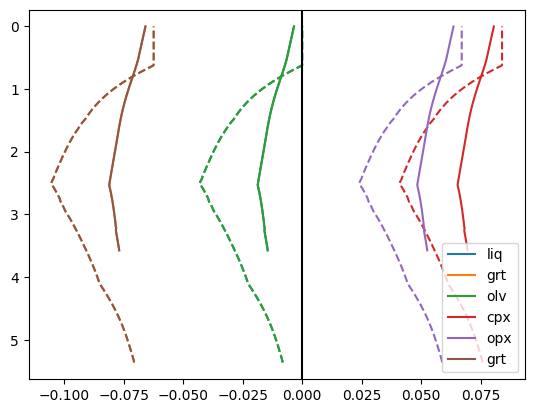

In [64]:
f, a = plt.subplots()

phases = ['liq', 'grt', 'olv', 'cpx', 'opx', 'grt']

for i in range(len(phases)):
    ph = phases[i]
    a.plot(column.composition['lz'][ph + '_d26Mg'], column.composition['lz']['P'], c='C'+str(i), label=ph)
    a.plot(column.composition['px'][ph + '_d26Mg'], column.composition['px']['P'], c='C'+str(i), ls='--')

a.invert_yaxis()

a.legend()

a.axvline(0, c='k')

plt.show()

/var/folders/s7/7xpdd_k536s0rc_3td0_83780000gp/T/ipykernel_43029/2539329738.py:51: UserWarning: A single bulk isotope ratio is being applied to every lithology. Unless there is no isotopic heterogeneity this means the calculation will only be indicative of general behaviour.
  warnings.warn("A single bulk isotope ratio is being applied to every lithology. "
/var/folders/s7/7xpdd_k536s0rc_3td0_83780000gp/T/ipykernel_43029/2539329738.py:51: UserWarning: A single bulk isotope ratio is being applied to every lithology. Unless there is no isotopic heterogeneity this means the calculation will only be indicative of general behaviour.
  warnings.warn("A single bulk isotope ratio is being applied to every lithology. "


20.324646049494874 278112.98315828125 363720.7395931723 390074.1428114499
0.006034726427017745
20.337618801139353 118551.86814446475 138480.71483859987 141831.37545014365
0.009514111194430797
20.35077656504451 70079.29706140363 78075.58221022048 78988.2504641966
0.011930619662425812
20.364104355183986 48052.56589337461 52184.38776112428 52539.81498100903
0.013775288634887417
20.377613654802495 35834.191893152114 38300.63596355563 38470.49629468242
0.01526457920442148
20.391284969049863 28200.51428766514 29816.387664596852 29909.043284660223
0.016512215255115592
20.404934533485445 23038.563824353412 24168.144479361195 24223.57690826549
0.017585059177482876
20.41826825962631 19345.187768136864 20173.451412899125 20208.95096518301
0.018525688125548
20.43116504905726 16588.36432530011 17218.33525356374 17242.288957783738
0.01936290431103771
20.443686821625406 14461.89634518432 14955.12099440429 14971.966291089682
0.020116989250640316
20.455817122960408 12777.965199420352 13173.289844571596

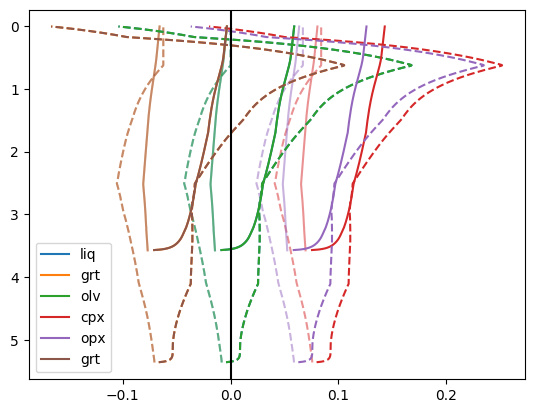

In [92]:
f, a = plt.subplots()

phases = ['liq', 'grt', 'olv', 'cpx', 'opx', 'grt']

column.calculateStableIsotopes('MgO', fractionationFactors, 'd26Mg', 
                               bulk=0.0, 
                               fractionalExtraction=False, parameter='delta', )

for i in range(len(phases)):
    ph = phases[i]
    a.plot(column.composition['lz'][ph + '_d26Mg'], column.composition['lz']['P'], c='C'+str(i), alpha=0.5)
    a.plot(column.composition['px'][ph + '_d26Mg'], column.composition['px']['P'], c='C'+str(i), alpha=0.5, ls='--')

column.calculateStableIsotopes('MgO', fractionationFactors, 'd26Mg', 
                               bulk=0.0, 
                               fractionalExtraction=True, parameter='delta', )

for i in range(len(phases)):
    ph = phases[i]
    a.plot(column.composition['lz'][ph + '_d26Mg'], column.composition['lz']['P'], c='C'+str(i), label=ph)
    a.plot(column.composition['px'][ph + '_d26Mg'], column.composition['px']['P'], c='C'+str(i), ls='--')

a.invert_yaxis()

a.legend()

a.axvline(0, c='k')

plt.show()




In [73]:
column.composition['lz']['liq_d26Mg']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1333   NaN
1334   NaN
1335   NaN
1336   NaN
1337   NaN
Name: liq_d26Mg, Length: 1338, dtype: float64

In [15]:
for var in phasediag_klb1.variables:
    print(var)

pressure
temperature
X
cpx
cpx_Al2O3
cpx_CaO
cpx_Cr2O3
cpx_FeO
cpx_K2O
cpx_MgO
cpx_Na2O
cpx_SiO2
cpx_TiO2
cpx_xAlM1
cpx_xAlT
cpx_xCaM2
cpx_xCrM1
cpx_xFe3M1
cpx_xFeM1
cpx_xFeM2
cpx_xKM2
cpx_xMgM1
cpx_xMgM2
cpx_xNaM2
cpx_xSiT
cpx_xTiM1
liq
liq_Al2O3
liq_AlM
liq_CaM
liq_CaO
liq_Cr2O3
liq_FeO
liq_K2O
liq_MgO
liq_Na2O
liq_SiO2
liq_TiO2
liq_feM
liq_mgM
liq_pct
liq_pek
liq_phm
liq_pjd
liq_pkj
liq_pol
liq_pq
liq_psl
liq_pti
liq_pwo
liq_sumM
olv
olv_Al2O3
olv_CaO
olv_Cr2O3
olv_FeO
olv_K2O
olv_MgO
olv_Na2O
olv_SiO2
olv_TiO2
olv_xCaM2
olv_xFeM1
olv_xFeM2
olv_xMgM1
olv_xMgM2
opx
opx_Al2O3
opx_CaO
opx_Cr2O3
opx_FeO
opx_K2O
opx_MgO
opx_Na2O
opx_SiO2
opx_TiO2
opx_xAlM1
opx_xAlT
opx_xCaM2
opx_xCrM1
opx_xFe3M1
opx_xFeM1
opx_xFeM2
opx_xMgM1
opx_xMgM2
opx_xNaM2
opx_xSiT
opx_xTiM1
plg
plg_Al2O3
plg_CaO
plg_Cr2O3
plg_FeO
plg_K2O
plg_MgO
plg_Na2O
plg_SiO2
plg_TiO2
plg_x(Ca)
plg_x(K)
plg_x(Na)
spn
spn_Al2O3
spn_CaO
spn_Cr2O3
spn_FeO
spn_K2O
spn_MgO
spn_Na2O
spn_SiO2
spn_TiO2
spn_xAlM
spn_xAlT
spn_xCrM
spn_xF